In [1]:
# Load the necessary libraries for processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, LassoCV
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
import xgboost as xgb


/Users/josephurciuoli/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/josephurciuoli/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# Load the training data into a dataframe
train_df = pd.read_csv('data/train.csv')

# Make sure that the data was loaded in properly
print "The dimensions of the data are {}".format(train_df.shape)
print
print "The column names of the dataframe are:"
print list(train_df.columns)

The dimensions of the data are (1460, 81)

The column names of the dataframe are:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF'

In [3]:
# Start getting an understanding for the data we're looking at. Want to see if there are any columns which
# can be dropped, how many missing values each feature has, etc.

# Leverage the built in pandas describe function to get some high level statistics on each column
train_df.describe()

/Users/josephurciuoli/anaconda/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Determine percentage of missing values in each of the different features
missing_totals = train_df.isnull().sum()
missing_totals = (missing_totals / train_df.shape[0]) * 100
missing_totals[missing_totals > 0.0].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### Missing Values Insight
It looks like several features have very high percentages of missing values. In particular, PoolQC, MiscFeature, Alley, Fence, LotFrontage, and FireplaceQu all have over 15% missing values. This number of missing values would be too high to impute values, so these features will be dropped as they will not be useful to our model.

We see that all of the Garage features have the same number of missing values. These Garage features are missing on the same rows which means there may have been some sort of systematic reason behind missing values in this case. Because of this, I don't want to throw these observations away and will instead incluode a new feature that specifies the value is NA in my one hot encoding process.  The same goes for the Bsmt features and MasVnr.  For the corresponding columns which are not categorical, I will be imputing values based upon the median of the column.

Electrical also has a row with a missing value. Because we are not short on training data and it's a single row, I will drop this observation.



In [5]:
# Drop the features with large numbers of missing values
train_df = train_df.drop((missing_totals[missing_totals > 15]).index,1)
train_df.columns

# Also drop the ID field which is irrelevant to our predications
train_df = train_df.drop('Id',1)

# Get rid of the missing Electrical row
train_df = train_df.dropna(axis=0,subset=['Electrical'])

# Impute values for the rest of the missing values
# To do this, we first get dummy values for all categorical features, then can use sklearn's imputer
print "Data types for features which will be imputed:"
feature_types = train_df[list((missing_totals[(missing_totals > 0.5) & (missing_totals < 15)]).index)].dtypes
print feature_types

# Save all of the feature types as well - will need this later on for further analysis
all_feature_types = train_df.dtypes
print all_feature_types
all_numeric_columns = [feat[0] for feat in zip(all_feature_types.index,all_feature_types) if feat[1] in ['float64','int64']]

categorical_columns = [feat[0] for feat in zip(feature_types.index,feature_types) if feat[1] == 'object']

# Get the dummy variables - want to separate this one-hot with the others
# because there should be an NA column for these features but not all others
train_df = pd.get_dummies(train_df,dummy_na=True,columns=categorical_columns)
train_df = pd.get_dummies(train_df)

numeric_columns = [feat[0] for feat in zip(feature_types.index,feature_types) if feat[1] == 'float64']

for column in numeric_columns:
    train_df[column] = train_df[column].fillna(train_df[column].median())


Data types for features which will be imputed:
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object
MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
F

## Analyzing the Target: SalesPrice

SalePrice is the feature we want to predict, so it is important to get an understanding of this feature. We want to discover insights such as outliers, distribution, and correlation with other variables.

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


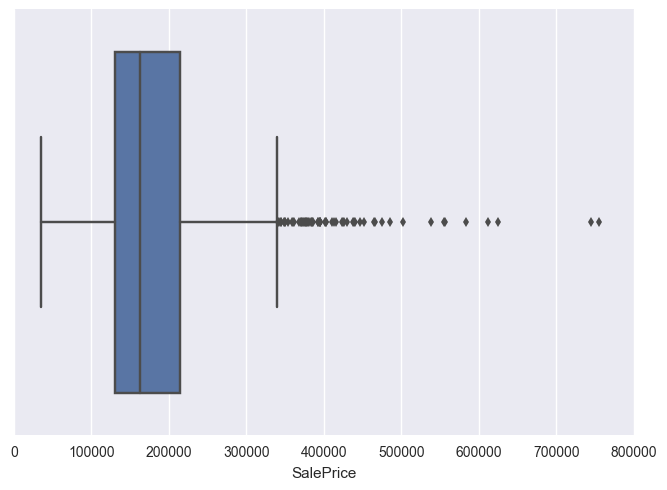

In [6]:
# Simple Descriptive Summary using built-in pandas function
print train_df['SalePrice'].describe()

# Supplement raw numbers with visualization
sns.boxplot(data = train_df, x='SalePrice')
sns.plt.show()

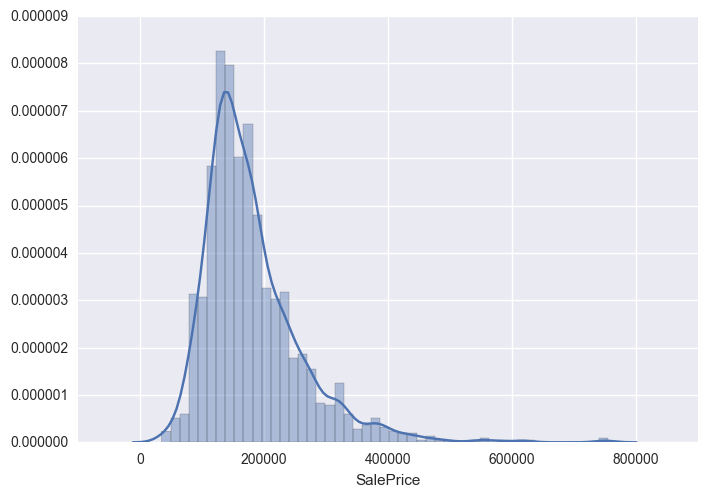

Skewness: 1.881943
Kurtosis: 6.529263


In [7]:
# Observe a histogram of SalePrice
sns.distplot(train_df['SalePrice'])
sns.plt.show()

# To supplement this, we can take a look at some numbers for skewness
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

We can make a couple of interesting observations about SalePrice from the above visualizations and numbers.  First, there seems to be some outliers in the dataset, namely when SalePrice is greater than 500000.  Although these observations span far outside of the distribution, it does not necessarily mean they would not be valuable to train our model with. As long as they follow the trends and we can make sense of that SalePrice from the its features, it is okay to leave them in. However, if they do not show any discernable reason why the SalePrice should be so high in the features, we may want to remove them and consider them noise. We can determine this later as we look at the SalePrice relationship against the other features.

Another couple of observations we can make is that the distribution of SalePrice does not follow the normal distribution.  We see a fairly high value of positive skewness in the feature. We can apply a simple log transformation here to fix that. In general, apply power transformations to the other variables in this dataset could also yield improvements in our models based upon their skewness.  However, this is omitted here.

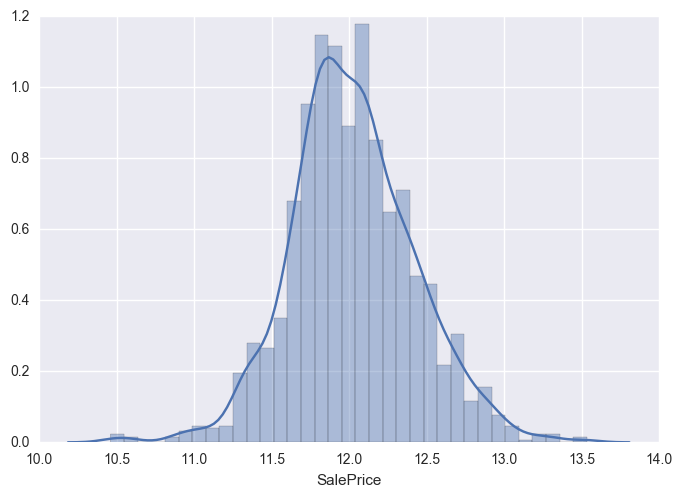

Skewness: 0.121318
Kurtosis: 0.806928


In [8]:
# Apply the log transformation on SalePrice
train_df['SalePrice'] = np.log(train_df['SalePrice'])

# Observe a histogram of SalePrice
sns.distplot(train_df['SalePrice'])
sns.plt.show()

# To supplement this, we can take a look at some numbers for skewness
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Things are looking much more normal for SalePrice now.

At the moment, we have 281 features. With only ~1500 data points to train on, this ratio is not favorable and we need to deal with the curse of dimensionality. Certainly, we can employ some advanced dimensionality reduction techniques, but let's first see how many we can knock out simply based on how correlated two variables are. For this, we will first take a look at a heatmap of the non-dummy variables correlations.

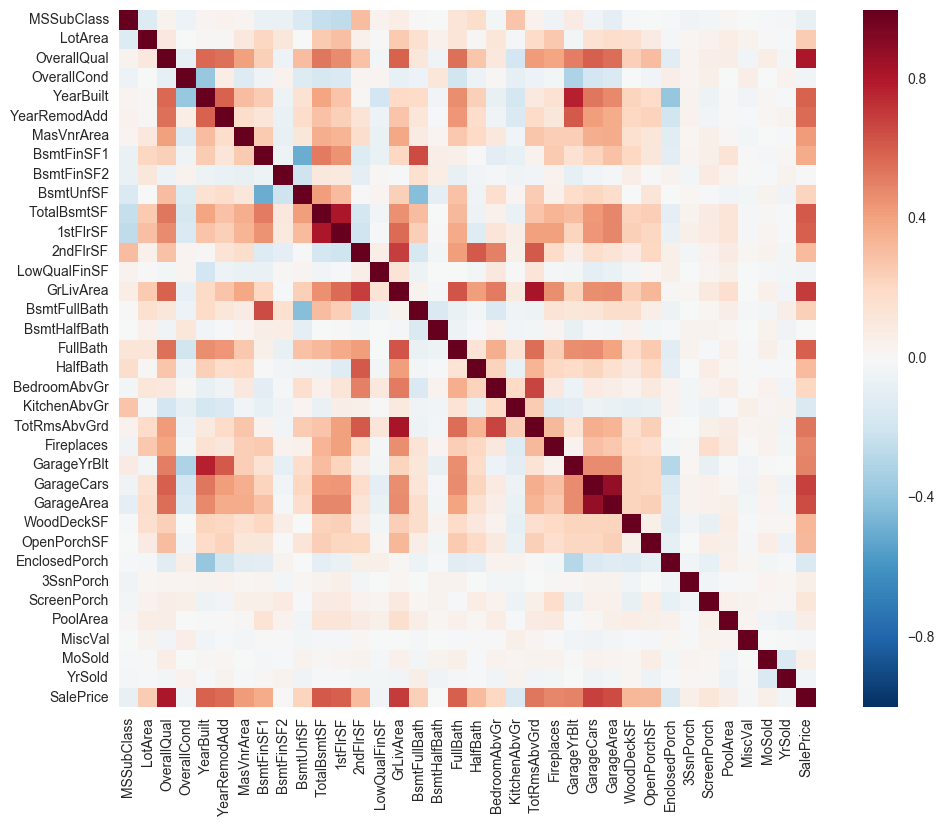

In [9]:

# Print a correlation matrix for all numeric variables
corrmat = train_df[all_numeric_columns].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1.0, square=True)
sns.plt.show()

A few observations on the above heatmap:
* SalePrice has very high correlation with a few features at a glance: OverallQual, GrLivArea, and GarageCars
* Several features have very high correlations and are candidates for removal to prevent multicollinearity amongst our variables in the models we build: GarageYrBlt & YearBuilt, TotRmsAbvGrd & GrLivArea, TotalBsmtSF & 1stFlrSF, GarageCars & GarageArea
* Several features have little to no correlation with any other features at all: EnclosedPorch, 3 SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold.  

Although the features listed in the first bullet above have high correlation, none of them are above 0.8, so they might still have some variance in them which can help our model. We will keep them around at this time.

Last, but not least, I'd like to look at a scatter plot of some of the more highly correlated variables against SalePrice.  Having a visual understanding of how your variables are a function of the target can be helpful in understanding model outputs.


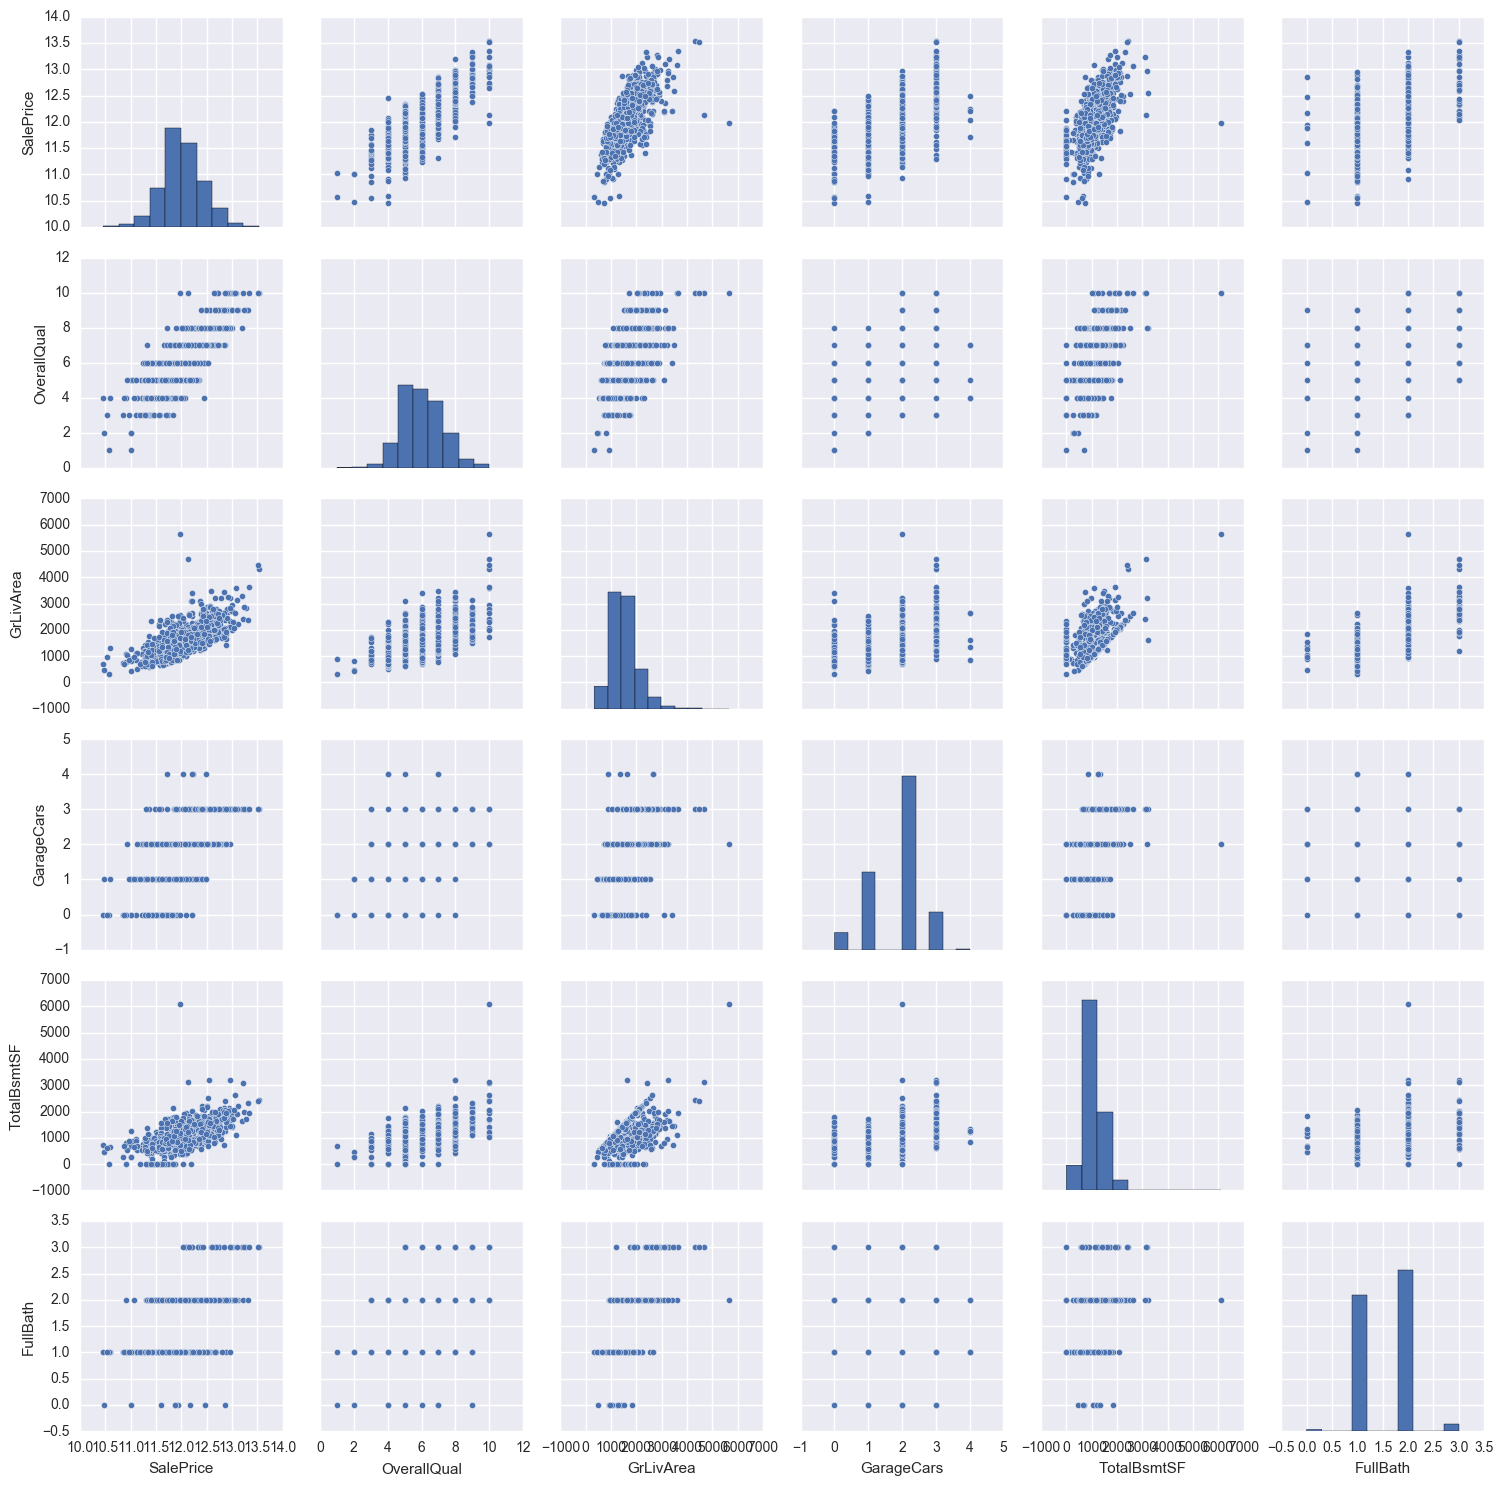

In [10]:
# View a scatter plot of the top 5 highest correlated variables with SalePrice
sns.set()
corr_columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(train_df[corr_columns], size = 2.5)
sns.plt.show()

For linear regression, it might make sense to do some transformation on these variable to make the relationship to SalePrice more linear. This will be omitted for the time being. We will get into building a few models now and come back later if it is evident that transforms and dimensionality reduction will do our model some good.  The four models we will build are:
* Ridge Regression
* Lasso Regression
* Random Forest
* XGBoost

But first, some processing on our test set such that we can plug it into our models for evaluation. Generally, if you have enough data, it is also good to have a validation set you remove from the train set that you keep separate from training/cross validation. For the purposes of this exploration, we will keep the train set whole.

Before this, I will apply one last processing step in scaling our features. The dataset will be standardized to remove mean and have unit variance for each feature.  Why are we doing this?  Our regression models especially may perform poorly if each individual feature is not more or less like a Gaussian distribution with 0 mean and unit variance.  The L2 Regularizer of Ridge and L1 Regularizer of Lasso assume that all features are composed in this way and therefore if a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to leaern from other features correctly as expected. We will perform this on numeric features only, not binary variables.


In [11]:
# Perform data standardization
scaler = StandardScaler()
all_numeric_features = all_numeric_columns
all_numeric_features.remove('SalePrice')
scaler.fit(train_df[all_numeric_features])
scaled = scaler.transform(train_df[all_numeric_features])
for i, col in enumerate(all_numeric_features):
    train_df[col] = scaled[:, i]


In [12]:
# Now to transform our test set as we did our train set
# Load the test data into a dataframe
test_df = pd.read_csv('data/test.csv')
# Drop the features that had high missing totals in the train set
test_df = test_df.drop((missing_totals[missing_totals > 15]).index,1)
# Also drop the ID field which is irrelevant to our predications
test_df = test_df.drop('Id',1)
# Get the dummy variables - want to separate this one-hot with the others
# because there should be an NA column for these features but not all others
test_df = pd.get_dummies(test_df,dummy_na=True,columns=categorical_columns)
test_df = pd.get_dummies(test_df)

# Determine percentage of missing values in each of the different features
missing_totals_test = test_df.isnull().sum()
missing_totals_test = (missing_totals_test / test_df.shape[0]) * 100
missing_totals_test = missing_totals_test[missing_totals_test > 0.0].sort_values(ascending=False)

missing_numerics = numeric_columns.extend(list(missing_totals_test.index))
for column in numeric_columns:
    test_df[column] = test_df[column].fillna(test_df[column].median())

# Some dummy variables created from the train set may not exist in the test set
# We can remove these values from the train set, as they will provide no insight into the ground truth value
difference = list(set(train_df.columns) - set(test_df.columns))
difference.remove('SalePrice')
train_df = train_df.drop(difference,1)

# And finally the standardization.... use the fit transformer from the train data
scaled = scaler.transform(test_df[all_numeric_features])
for i, col in enumerate(all_numeric_features):
    test_df[col] = scaled[:, i]
    
test_df.describe()

# Note to future self - it might be best to combine test and train sets previous to preprocessing, and then separating
# after to avoid doing all of this twice. This would not be the case in real life, however, where we don't have our
# test data.  This is a bit problematic because of the imputation we did so technically we are changing train data
# based on test data which is a no-no.

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,0.011748,-0.069951,-0.015367,-0.019711,0.003769,-0.057556,-0.019446,-0.010529,0.037207,-0.029730,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,1.010654,0.496483,1.039137,1.000937,1.006654,1.023898,0.979473,0.998175,1.095366,0.989310,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,-0.871979,-0.906437,-3.688494,-4.112292,-3.055529,-1.688721,-0.571009,-0.973668,-0.288760,-1.284096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.871979,-0.313224,-0.795596,-0.517424,-0.604322,-1.058792,-0.571009,-0.973668,-0.288760,-0.787311,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-0.162696,-0.112047,-0.072372,-0.517424,0.058166,0.346432,-0.571009,-0.204943,-0.288760,-0.242997,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.310159,0.100202,0.650852,0.381293,0.985650,0.927905,0.325449,0.675636,-0.288760,0.520853,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.147291,4.616923,2.820525,3.077444,1.283770,1.218641,6.567453,7.821155,9.171012,3.559277,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Perform Ridge Regression on the dataset
X_train = train_df.ix[:, train_df.columns != "SalePrice"]
Y_train = train_df["SalePrice"]


# RMSE will be used as the error metric for tuning
# This function takes in a model, and returns the cross validation error metric using RMSE
def root_mean_square_cv(model,X_train, Y_train):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 10))
    return rmse


For Ridge Regression, we need to tune only a single parameter: alpha. Alpha is the regularization strength of the
model and determines to what extent higher weights will be penalized. Instead of simply minimizing the 
residual sum of squares, we also have a penalty term on large weights. If the weights take on large values, the optimization function is penalized, and therefore the algorithm preferes weights closer to zero to keep the penalty down.

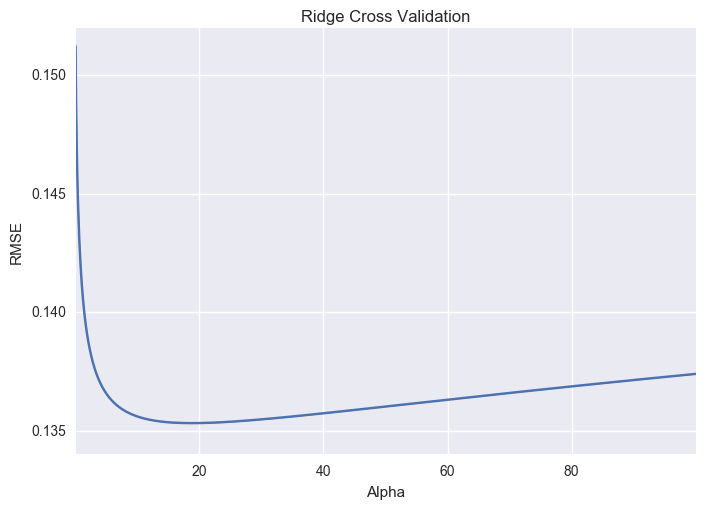

In [14]:
# Find the alpha that provides the best cross validation score
alphas = np.arange(0.05,100,.1)
ridge_cross_validation = [root_mean_square_cv(Ridge(alpha = alpha),X_train,Y_train).mean() for alpha in alphas]
sns.set()
ax = sns.tsplot(data=ridge_cross_validation,time=alphas)
ax.set(xlabel='Alpha', ylabel='RMSE',title="Ridge Cross Validation")
sns.plt.show()

The skewed U-shaped curve we see above gives us insight into what varying the alpha value does to our model.  We see with very low alpha values that our RMSE is extremely high, but shoots down quite abruptly before reaching a minimum value.  This minimum value is:

In [15]:
min(ridge_cross_validation)

0.13531784322924797

With low alphas, our model exhibits high variance as it allows the weights in our model to grow without much penalty. These high RMSE errors are most likely due to overfitting in our model. Increasing alpha reduces variance, but increases bias in the model.  The key is to find the best tradeoff between bias and variance which is at the minimum of this curve.  As alpha goes past this minimum point, our model includes stronger and stronger regularization, which leads to the model having less complexity and therefore not being able to model the underlying relationship. The alpha which we will want to use for our Ridge model is:

In [16]:
alphas[np.argmin(ridge_cross_validation)]

18.750000000000004

We now know what alpha is the best to use for our Ridge model and the level of RMSE this will achieve for us on the train set through cross validation, however, we can gain further insight by plotting a learning curve for this model.  The learning determines cross-validated training and test scores for different training set sizes and can provide us with insight into how our model is fitting the data.

In [17]:
# The learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, -(train_scores_mean - train_scores_std),
                     -(train_scores_mean + train_scores_std), alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, -(test_scores_mean - test_scores_std),
                     -(test_scores_mean + test_scores_std), alpha=0.1, color="g")
    plt.plot(train_sizes, -train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, -test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

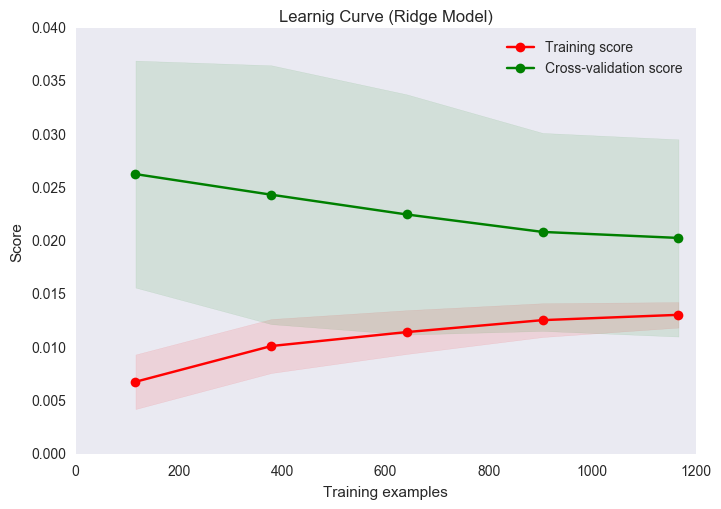

In [18]:
# Plot the learning curve for the Ridge model
title = "Learnig Curve (Ridge Model)"
cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)
estimator = Ridge(alpha=18.75)
plot_learning_curve(estimator, title, X_train, Y_train, cv=cv, n_jobs=4)
plt.show()

It's important to note that the Score in the above Learning Curve is negative mean squared error, which is slightyly different from what we used in cross validation (doesn't apply square root).  This isn't an issue, as the shape of these two curves is what's really important.

In looking at the above curve, the main insight I grab is the large gap between Training score and Cross-validation score, which is indicative of high variance in our model.  This tells us that our model may be overfitting. This is not a suprising insight to me, as we had over 200 features and only about 1400 training examples. Another interesting piece we can see from this graph is the variance in the cross-validation score's values as seen in the green area surrounding the cross-validation line. This tells us that our model is very sensitive to the subset of training data we feed it, which is another indicator of our model not generalizing.

How do we fix high variance in our models? Getting more examples would be the most ideal, but is not an option in this case. However, we can use less of the features that were provided to us, eliminating ones that are less important and maybe responsible for some noise in our data. This brings us to our next model, where we will use Lasso Regression which uses L1 regularization instead of L2 as Ridge does and will drive the weights on unimportant features to 0, effectively eliminating them.



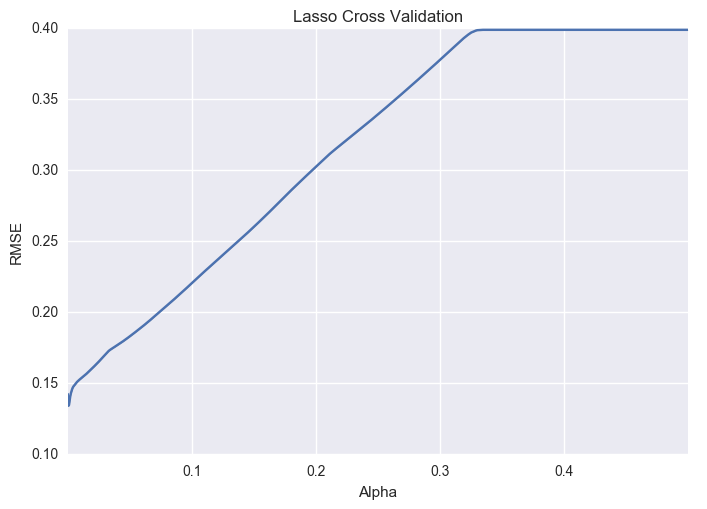

In [19]:
# Lasso also has an alpha parameter which controls regularization. We will tune that here
# Find the alpha that provides the best cross validation score
alphas = np.arange(0.0001,0.5,.0005)
lasso_cross_validation = [root_mean_square_cv(Lasso(alpha = alpha),X_train,Y_train).mean() for alpha in alphas]
sns.set()
ax = sns.tsplot(data=lasso_cross_validation,time=alphas)
ax.set(xlabel='Alpha', ylabel='RMSE',title="Lasso Cross Validation")
sns.plt.show()


We see an interesting result with the Lasso cross validation for different alpha values. The first thing to notice is that the range of alphas is much smaller than that of Ridge. Lasso's RMSE saturated at around an alpha of 0.32. In Lasso regression, when alpha is very high, we get very sparse solutions. However, when alpha is close to 0, we get weights closer to that of linear regression. In fact, an alpha of 0 in Lasso regression will output the same weights as Linear regression. With so many features, I was expecting larger values of alpha to perform better because it would knock out more variables. However, it seems from the above plot that although some feature selection through Lasso helps the model perform better, reducing the complexity of the model too much becomes detrimental.

In [20]:
min(lasso_cross_validation)

0.13414595991426831

This is a nice result. Although it's only marginal, the RMSE of the Lasso model improves upon that of the Ridge model, as expected. It seems the model benefitted from the sparsity created by the L1 regularization.

In [21]:
alphas[np.argmin(lasso_cross_validation)]

0.00060000000000000006

This is a very small alpha value, which makes one curious - just how much sparsity did the Lasso regularization create?

In [22]:
model_lasso = Lasso(alpha=alphas[np.argmin(lasso_cross_validation)]).fit(X_train, Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print "Lasso picked {picked} variables and eliminated the other {eliminated} variables".format(picked=sum(coef != 0),eliminated=sum(coef == 0))

Lasso picked 103 variables and eliminated the other 160 variables


Lasso has eliminated over half of our variables. This is a really cool result. Simply using an L1 penalty with our regression models is able to improve our dimensionality to help prevent overfitting in our models.

Up next, we are going to give random forests a try with this problem. Random forests may perform well on this problem, as it generates an internal unbiased estimate of the generalization error as the forest building progresses and is able to handle large amounts of input variables without variable deletion. This is perfect for our problem.

### Random Forest

Random forests is built upon a simple concept at it's core but has found to be a very strong technique for many machine learning problems. For regression problems, Random Forests are building N different trees and can then do an average over those N trees for a new sample to determine what the model believes the output will be.  To build each of these different trees, the model first chooses a bootstrap sample from the training data. It then constructs the tree such that at each node of the tree, a random subset of the features is chosen from which the splitting at that node can occur. As a result of this random selection of features, the bias of the forest usually slightly increases in comparison to a single non-random tree, but its variance decreases due to averaging which will usually more than compensate for the increase in bias.

For these models, there are two main parameters we will need to adjust: the number of estimators and the maximum number of features.  The number of estimators represents the number of trees in the forest. The more trees the bestter, but it's important to remember this will also cause computation to increase. The maximum number of features is the size of the random subsets of features to consider when splitting a node. Lower values of this will cause a greater reduction in variance, but also a greater increase in bias. Cross validation will be used to choose these parameters.

In [23]:
# Build grid search for the random forest regressor
tuned_parameters = [{'n_estimators':[200,500,1000,2000],'max_features':['auto','sqrt','log2']}]
clf = GridSearchCV(RandomForestRegressor(random_state=0,n_jobs=-1),tuned_parameters,cv=10,scoring='neg_mean_squared_error')
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [200, 500, 1000, 2000], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
print "Best parameters found on training set:"
print
print clf.best_params_

Best parameters found on training set:

{'max_features': 'auto', 'n_estimators': 2000}


The best parameters found through cross validation are as expected. With Random Forests, the more estimators the better, so the largest number of trees which we put into the grid search would have most likely been chosen until reaching a critical number of trees where performance is no longer improved. The pitfall to this is that as the number of estimators increases, so does the amount of time it takes to train the model. The cross-validation also found that using all of the features was optimal for the size of the subsets of features to consider when splitting a node. The smaller the value, the greater the reduction in variance, but also the greater the increase in bias.

We can now determine what kind of performance the Random Forest model will achieve through cross-validation.

In [25]:
# Get performance of Random Forest Regressor with optimal parameters
random_forest_performance = root_mean_square_cv(RandomForestRegressor(random_state=0,
                                                                      n_jobs=-1,
                                                                      max_features='auto',
                                                                      n_estimators=2000),X_train,Y_train).mean()
print "Random Forest CV Performance",random_forest_performance

Random Forest CV Performance 0.139559043659


It turns out our regression models actually performed better than random forest in this case. The reason for this could be that we simply did not have enough estimators in our ensemble to drive down error closer to the regression models. The regression models also had regularization built-in, and while random forests do not overfit, the estimators were still forced to work with a very large number of features. Let's see what the learning curve of the model tells us about it.

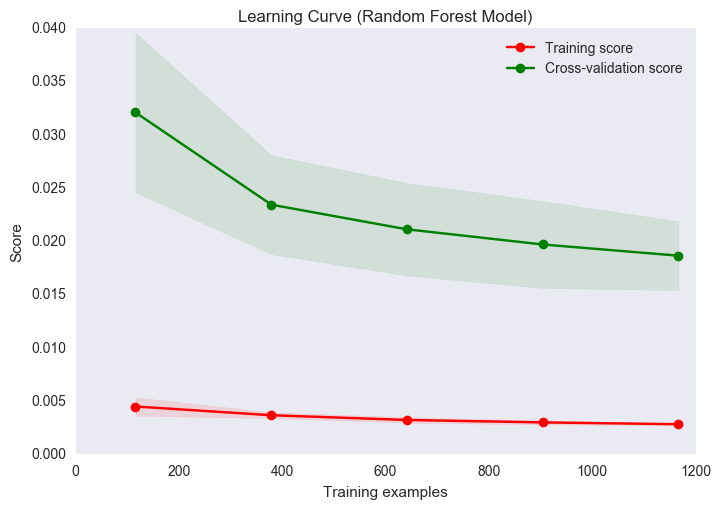

In [26]:
# Plot the learning curve for the Random Forest model
title = "Learning Curve (Random Forest Model)"
cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = RandomForestRegressor(random_state=0,n_jobs=-1,max_features='auto',n_estimators=2000)
plot_learning_curve(estimator, title, X_train, Y_train, cv=cv, n_jobs=-1)
plt.show()

Yikes! It looks like there is some serious overfitting going on here. This can be determined by the large gap between the training score and the cross-validation score.  Our random forest is most likely suffering from the large number of variables. This could be handled by adding more estimators and reducing the number of random features considered at each node. However, the 2000 estimators already takes quite a bit of time to run. Instead, I will see what the Principal Component Analysis technique can do for the model. PCA is used to emphasize the variance in datasets and bring out strong patterns. It does so by decomposing multivariate datasets into a set of succcessive orthogonal components which explain a maximum amount of variance. The hope is that we will be able to represent most of the variance in the dataset with far less dimensions.

One caveat behind PCA is that after we perform these transformations, we destroy the explainability of our original variables. With our regression models, we could see exactly how much each feature affected the price, and which features were most important. After PCA is applied, the components represent different dimensions in our dataset and will not give us the ability to understand which features are causing what outcome.

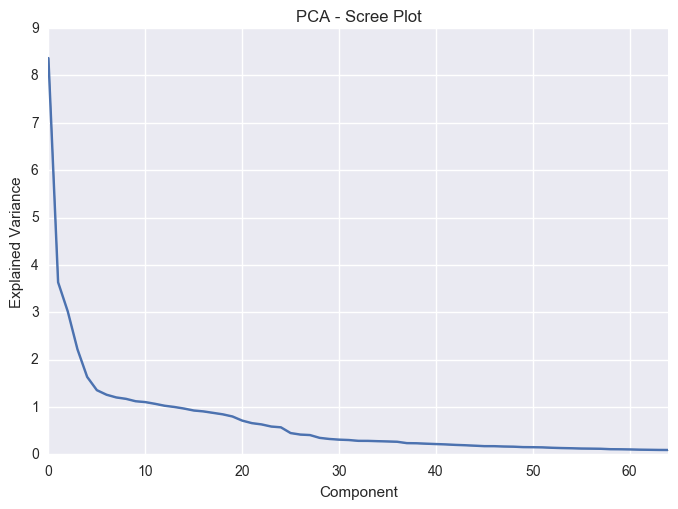

[ 8.36604823  3.63251671  3.01548609  2.21644972  1.63475563  1.35479733
  1.25850956  1.20157855  1.1719797   1.12110678  1.10300471  1.0668772
  1.02597488  1.00010094  0.96654403  0.92569369  0.90660856  0.87557382
  0.84456982  0.79921514  0.7123236   0.65879537  0.63195627  0.58693532
  0.57019951  0.44925299  0.41746622  0.40684911  0.34769292  0.32450505
  0.31027021  0.30216456  0.28481999  0.28394778  0.27752011  0.27245863
  0.26553588  0.23654622  0.23366773  0.22483916  0.21691796  0.2098804
  0.19950956  0.19216675  0.18268764  0.17276067  0.17207327  0.16554285
  0.16170275  0.15245366]


In [27]:
# Apply PCA to the dataset - we will have 25% of the total features decomposed into components, then decide how
# many we would like to keep using a Scree test
pca = PCA(n_components=(X_train.shape[1]/4)).fit(X_train)
sns.set()
ax = sns.tsplot(data=pca.explained_variance_)
ax.set(xlabel='Component', ylabel='Explained Variance',title="PCA - Scree Plot")
sns.plt.show()
print pca.explained_variance_[:50]

The idea behind a scree test is that we examine the magnitude of the eigenvalues visually against the number of components. We can determine where the lines stops descending precipitously and levels out to a less agressive slope. This is also called the elbow method. In the above Scree plot, we can determine that the first 6 components are the ones that we will want to keep. However, there is another second change in slope at 26 variables which is also noticeable. Although the true elbow method would say take 6, I will take 26 as their seems to still be a great deal of variance in the components until that point. This is great - our dataset just went from over 200 variables to less than 30, and should still have much of the variance in the dataset represented. This should help with our dimensionality issue in random forest.

In [28]:
# Transform our features
X_train_pca = PCA(n_components=26).fit_transform(X_train)
X_train_pca = pd.DataFrame(data=X_train_pca)

In [29]:
# Rerun Random Forest which PCA reduced dataset
random_forest_performance = root_mean_square_cv(RandomForestRegressor(random_state=0,
                                                                      n_jobs=-1,
                                                                      max_features='auto',
                                                                      n_estimators=2000),X_train_pca,Y_train).mean()
print "Random Forest PCA CV Performance",random_forest_performance

Random Forest PCA CV Performance 0.137830461815


Cool, so it looks like PCA was able to reduce the error with our random forest model. This most likely comes from the reduction in variance that occurs with fewer variables. 

Overall, we still were not able to achieve the same error levels we did with our two regression models. This many be due to the distribtion of SalePrice data points that we observed earlier in our analysis. Bagged models which are made by taking bootstrap samples from the data set tend to perform badly in the extremes. Even after our log transformation, the SalePrice feature still has fairly long tails. A random forest regression averages the predictions of a large number of classifiers (2000) in our case. If we have several points which are far from the others, many of these random forest classifiers will not observe them, and when trying to predict on values in this range, will essentially be makin out-of-sample predictions which will most likely be poor. The few classifiers that have seen one or more of these sample points will be overruled by the majority which have not seen them as we average over all of the classifiers. In this case, regression does a much better job of handling the more extreme values, as they are taken into account for determining optimal weights just as much as all of the other data points.

### XGBoost

The last model that will be trained for the House Prices prediction is XGBoost which is short for Extreme Gradient Boosting. This algorithm is wildly popular in the Kaggle community, and given I had no experience with it but have heard how great and flexible it is, I wanted to study the theory and get some practice with it here. So, first, a little discussion on what Extreme Gradient Boosting is. My below explanation comes from the xgboost library documentation which can be found here: http://xgboost.readthedocs.io/en/latest/model.html .

XGBoost is a tree ensemble model made up of a set of classification and regression trees (CART). A CART is different from a decision tree, where the leaf contains only decision values. In CART, a score is associated with each of the leaves which gives us further interpretability than just a classification.

For our tree ensemble, the prediction scores of each individual tree are summed up to get to the final score. The equation for this model can be seen below:

![title](img/eq1.png)

where K is the number of trees in the ensemble, f is a function in the functional space F, and F is the set of all possible CARTs. Our objective function for this model that we want to optimize can be written as:

![title](img/eq2.png)

where l is our loss function and omega represents our regularization term.  

We can see from these equations that random forests and xgboost are not different in terms of the underlying model, however they are different in how we train them. 

Once we have our objective function defined, we will want to optimize it in order to obtain best performance. However, finding each of these functions where each is represented by an underlying tree structure and leaf scores is not as simple as taking the gradient. Instead, an additive strategy is used which aims to fix what we have learned, and add one new tree at a time in our training. In this way, the prediction value at step t can be defined as follows:

![title](img/eq3.png)

To summarize, the prediction value at step t is the prediction value at step t-1 plus the value of the function at step t based upon some set of training data. We still need to determine how we will create a tree at each step - again the intuitive thing to do would be to optimize the objective function:

![title](img/eq4.png)

And using Mean Squared Error as our loss function, the objective becomes:

![title](img/eq5.png)

This is cool in the form of MSE because it offers a first order term or residual and a quadratic term. However, with other forms of loss such as logistic loss, getting the objective into a nice form is not so simple. In this case, the Taylor exapansion of the loss function can be used up to the second order as below.

![title](img/eq6.png)
![title](img/eq7.png)

Removing constants, the final objective at step t becomes

![title](img/eq8.png)

So there we have it. We now have an optimization goal for our tree. The beauty of the above is that we can define any loss function, input it in the g and h for the solver above, and optimize. In this way, xgboost can support every loss function which is an awesome property in terms of flexibility.

Up until this point in the discussion, the regularization term has simply been following the rest of the objective around.  In order to define the complexity of the tree, represented by omega, we first want to refine the definition of the tree as 

![title](img/eq9.png)

In the above, w is the vectors of scores on leaves, q is a function assigning each data point to the corresponding leaf, and T is the number of leaves. XGBoost therefore defines the complexity as

![title](img/eq10.png)

In this function, we can see that a large number of leaves, or very high values on the scores of the leaves can both be penalized to reduce the amount of complexity our model has.

Once we've expanded out the model complexity, we can now rewrite the objective value as follows

![title](img/eq11.png)

where I_j = {i|q(x_i)=j} is the set of indices of data points assigned to the j-th leaf. We index in the summation is changed in this way because all of the data points in the same leaf get the same score. Defining G as the summation across data points on g and H as the summation of data points on h, we obtain the following

![title](img/eq12.png)

Using the above, we can reduce our objective function to

![title](img/eq13.png)

The final equation above gives us a measure of how 'good' our tree structre q(x) is. The smaller the score in the above, the better the structure is. For a given tree structure, we push the statistics g and h to the leaves they belong to, sum those statistics together, and use the formula to determine the score. A high score means that we may have a tree the is very imbalanced towards a single leaf, or the we too many leaves. The key is finding the balance. The score we see here is similar to the impurity measure in a decision tree which defines how well classes are separated, except that it also takes the complexity into account.

Once the way to measure a good tree is defined, we would ideally like to enumerate all possible trees and pick the best one. This is obviously not tractable in real-world scenarios, so instead we try to optimize on level of the tree at a time. We try to split a leaf into two leaves, and the score it gains is defined as 

![title](img/eq14.png)

which can be decomposed term by term left to right as
    1. the score on the new left leaf
    2. the score on the new right leaf
    3. the score on the original leaf
    4. regularization on the additional leaf

We can make an important distinction from the Gain above - if the gain is smaller than gamma, it is better to not add the branch. This is exactly the pruning techniques used in other tree based models.

In our case, we are using real valued data, so we will want to search for an optimal split. To efficiently do this, instances are placed in a sorted order and scanned left to right to calculate the structure score of all possible split solutions, which then allows us to choose the best one.

With that introduction out of the way, it now seems like a good time to see what XGBoost can do with our problem.

In [ ]:
dtrain = xgb.DMatrix(X_train, label = Y_train)

# Perform some cross validation to find the optimal parameters
tuned_parameters = [{'n_estimators':[100,500,1000,1500],
                     'max_depth':[4,6,8],
                     'learning_rate':[0.1,0.3,0.5],
                     'gamma':[0,5,10]}]
clf = GridSearchCV(xgb.XGBRegressor(),tuned_parameters,cv=10,scoring='neg_mean_squared_error')
clf.fit(X_train, Y_train)

There are four parameters which I looked to tune for our XGBoost model. There are many, many more that can be done, but these four seemed to be the most important. Here is a brief overview of what each of the parameters will do:
    - n_estimators: the number of trees in the ensemble. Generally, the more the merrier, but this can take a very long time
    - max_depth: the maximum depth of a tree. The deeper the trees, the more complex the model.
    - learning_rate: the step size shrinkage. After each boosting step, we can directly get the weights of new features. The learning_rate shrinks the feature weights to make the boosting process more conservative.
    - gamma: the minimum loss reduction required to make a further partition on a leaf node of the tree. The larger the gamma value, the less complex the model will be.

In [33]:
print "Best parameters found on training set:"
print
print clf.best_params_

Best parameters found on training set:

{'n_estimators': 500, 'learning_rate': 0.1, 'max_depth': 4, 'gamma': 0}


In [35]:
# XGBoost CV Performance
xgboost_performance = root_mean_square_cv(xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                                                           max_depth=clf.best_params_['max_depth'],
                                                           learning_rate=clf.best_params_['learning_rate'],
                                                          gamma = clf.best_params_['gamma']),X_train,Y_train).mean()
print "XGBoost CV Performance",xgboost_performance

XGBoost CV Performance 0.123699734271


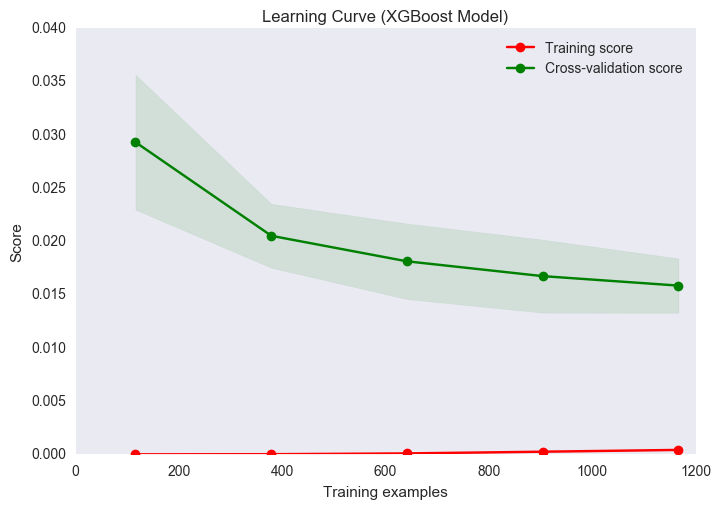

In [36]:
# Plot the learning curve for the XGBoost model
title = "Learning Curve (XGBoost Model)"
cv = cross_validation.ShuffleSplit(X_train.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = xgb.XGBRegressor(n_estimators=clf.best_params_['n_estimators'],
                                                           max_depth=clf.best_params_['max_depth'],
                                                           learning_rate=clf.best_params_['learning_rate'],
                                                          gamma = clf.best_params_['gamma'])
plot_learning_curve(estimator, title, X_train, Y_train, cv=cv, n_jobs=-1)
plt.show()

Now I see what the hype is all about. XGBoost was able to achieve the best performance on this dataset by a solid margin. What is even cooler is how quickly the model was able to be trained. The random forest models with 2000 estimators took much longer to train and still weren't able to achieve the same error as the XGBoost models. Bumping the number of estimators down for XGBoost would drive down error even further most likely. One thing I found interesting was that in my grid search CV, the larger number of estimators did not decrease error, which goes against my previous statement. With boosting, we generally say that the more weak learners we can add to our model the better.  My guess is that we hit a point of severely diminished returns at 500 estimators, by chance, the 500 estimator model performed better than the 1000 and 1500 estimator model. This is hard to swallow as it goes against my intuition for boosting.